<a href="https://colab.research.google.com/github/Anagefilho/Anagefilho/blob/main/Imers%C3%A3o_de_dados_Alura_4%20-%20Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alura Imersão Dados - **4ª Edição** - Notebook de Anagê

# Desafios - Aula 1


In [2]:
import pandas as pd
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(caminho)


1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo **Paulo**)

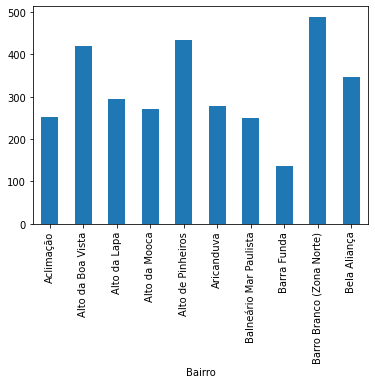

In [4]:
#Utilizando a função group by, onde você consegue realizar operações em colunas agrupadas por tipo, etc. Documentação https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
media_metragem = data.groupby("Bairro")["Metragem"].mean()
media_metragem.head(10).plot.bar()

2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

In [7]:
#1º Jeito, agrupamento - Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
bairros_metragem = data.groupby("Bairro") 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
 #2º Jeito, rotulação  - Documentação: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html?highlight=select
escolha_bairro = "Vila Mariana"            
data[data["Bairro"] == escolha_bairro]

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

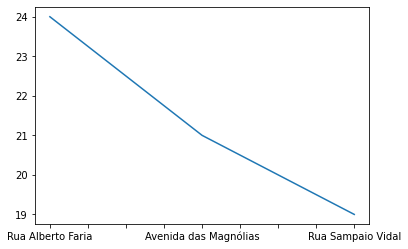

In [17]:
ruas_imoveis = data["Rua"].value_counts() #top 3 ruas com mais imóveis
ruas_imoveis.head(3).plot.line() 

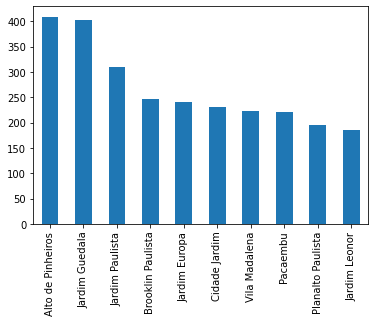

In [28]:
n_imoveis_pbairro=data["Bairro"].value_counts()
n_imoveis_pbairro.head(10).plot.bar()

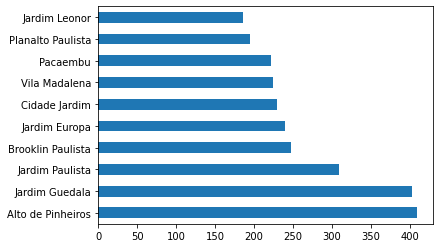

In [29]:
#Para melhor visualização, podemos usar o gráfico com barra horizontal
n_imoveis_pbairro.head(10).plot.barh()

4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

In [54]:
#Pegando média de banheiros
media_banheiro = data["Banheiros"].mean()
print("Média de banheiros:", media_banheiro)

mediana_banheiros = data["Banheiros"].median() #Mediana dos banheiros é 4 
print("Mediana de banheiros:", mediana_banheiros)

max_banheiro = data["Banheiros"].max()
print("Máximo de banheiros em um imóvel:", max_banheiro)#O imóvel com mais banheiros possui 40 o.o' #Outlier

max_b_id = data["Banheiros"].idxmax()  #Procurando o a localização desse imóvel com 40 banheiros

min_banheiros = data["Banheiros"].min() 
print("Mínimo de banheiros num imóvel: ", min_banheiros)


moda_banheiros = data["Banheiros"].mode()
print("Moda de banheiros:", moda_banheiros)

print("\n \n Tupla do imóvem com mais banheiros: (fiquei curioso) \n \n", data.loc[2062],"\n") #Localização da tupla 2062 que é onde descobrimos onde possui 40 banheiros, fiquei curioso

Média de banheiros: 3.8790967226219024
Mediana de banheiros: 4.0
Máximo de banheiros em um imóvel: 40
Mínimo de banheiros num imóvel:  1
Moda de banheiros: 0    3
dtype: int64

 
 Tupla do imóvem com mais banheiros: (fiquei curioso) 
 
 Rua                     NaN
Bairro       Jardim Guedala
Cidade            São Paulo
Metragem                488
Quartos                   4
Banheiros                40
Vagas                     4
Valor          R$ 2.600.000
Name: 2062, dtype: object 



5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)


In [ ]:
data[data["Rua"].isna()]["Bairro"] #Bairros que possuem ruas com NaN - Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.isna.html

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9963                   Jardim Petrópolis
9989                Parque Alves de Lima
9991                        Vila Formosa
9995                       Jardim Leonor
9999                   Jardim Petrópolis
Name: Bairro, Length: 3434, dtype: object